In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [23]:
df = pd.read_csv('../spotify.csv', encoding='latin')

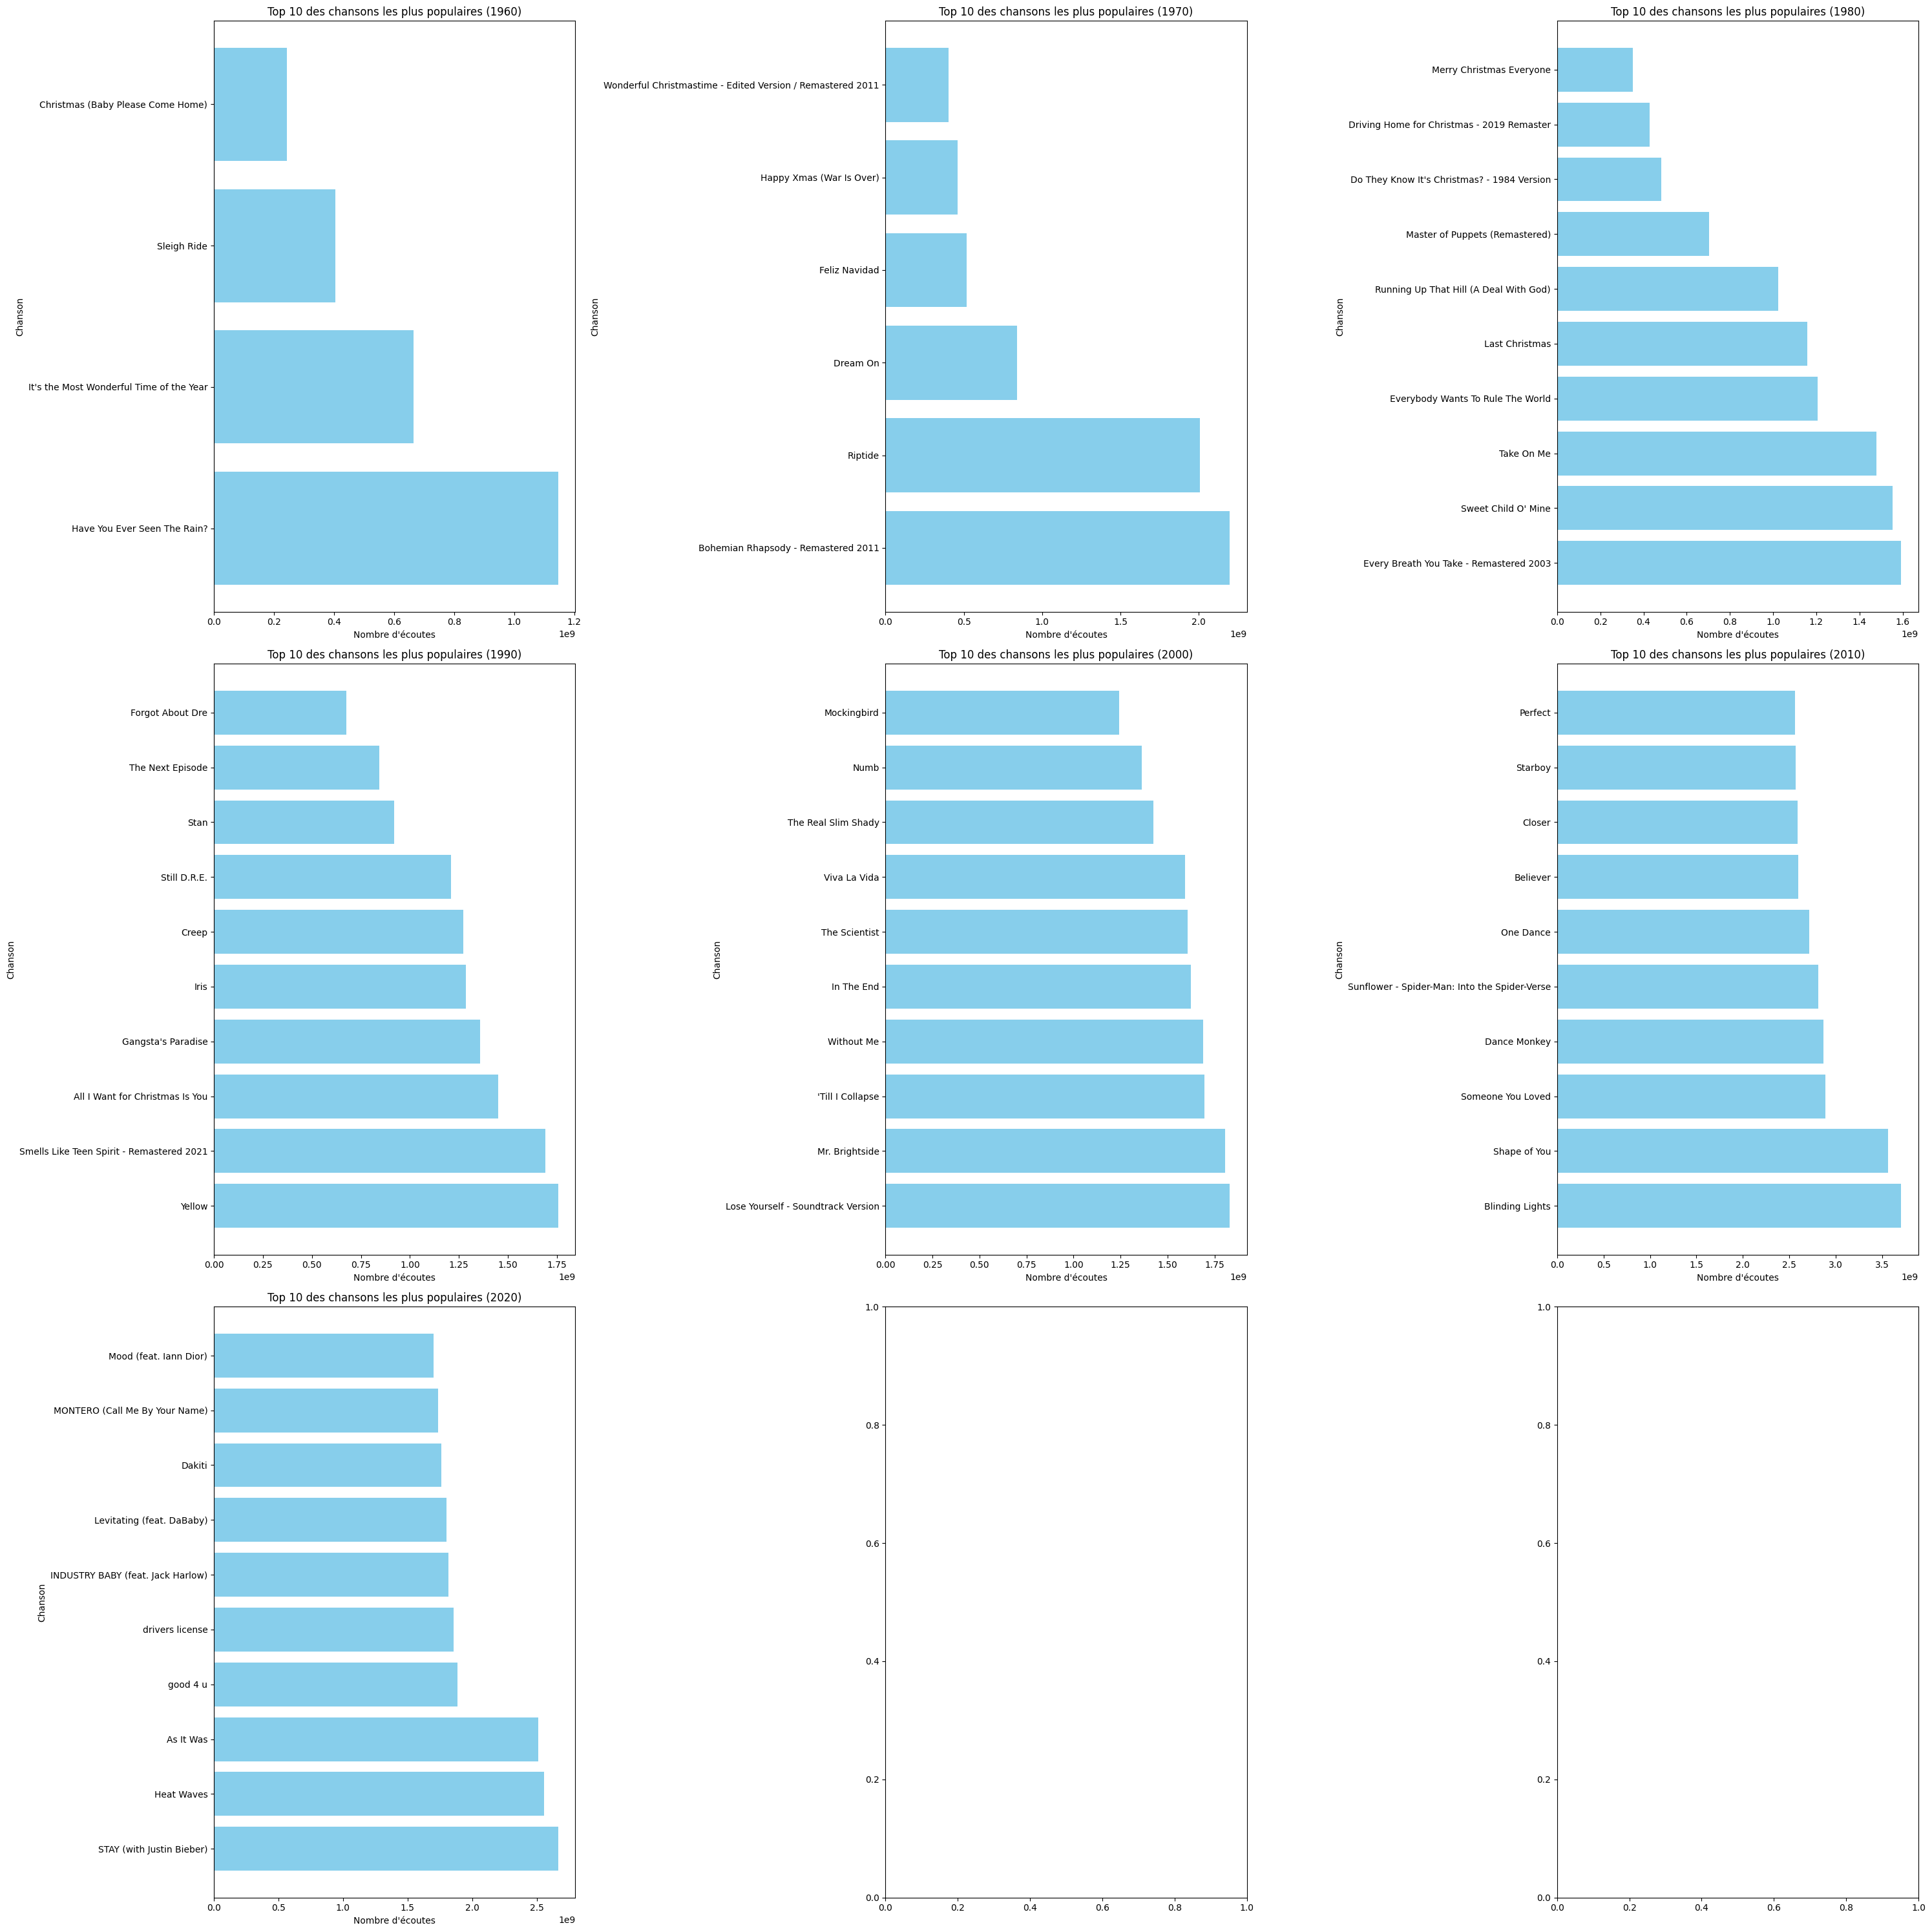

In [29]:

fig, axs = plt.subplots(3, 3, figsize=(30, 30))

# Pour chaque décennie
for i, (decennie, (annee_debut, annee_fin)) in enumerate(decenies.items()):
    # Filtrer les chansons de la décennie
    df_decennie = df.loc[df["released_year"].between(annee_debut, annee_fin)]
    
    # Trier par nombre d'écoutes
    df_decennie = df_decennie.sort_values("streams", ascending=False)

    top_10_decennie = df_decennie.head(10)
    
    # Créer un sous-ensemble pour le tracé
    ax = axs[i // 3, i % 3]
    
    # Tracer le top 10 des chansons de la décennie
    ax.barh(top_10_decennie["track_name"], top_10_decennie["streams"], color='skyblue')
    ax.set_title(f"Top 10 des chansons les plus populaires ({decennie})")
    ax.set_xlabel('Nombre d\'écoutes')
    ax.set_ylabel('Chanson')


plt.tight_layout()
plt.show()

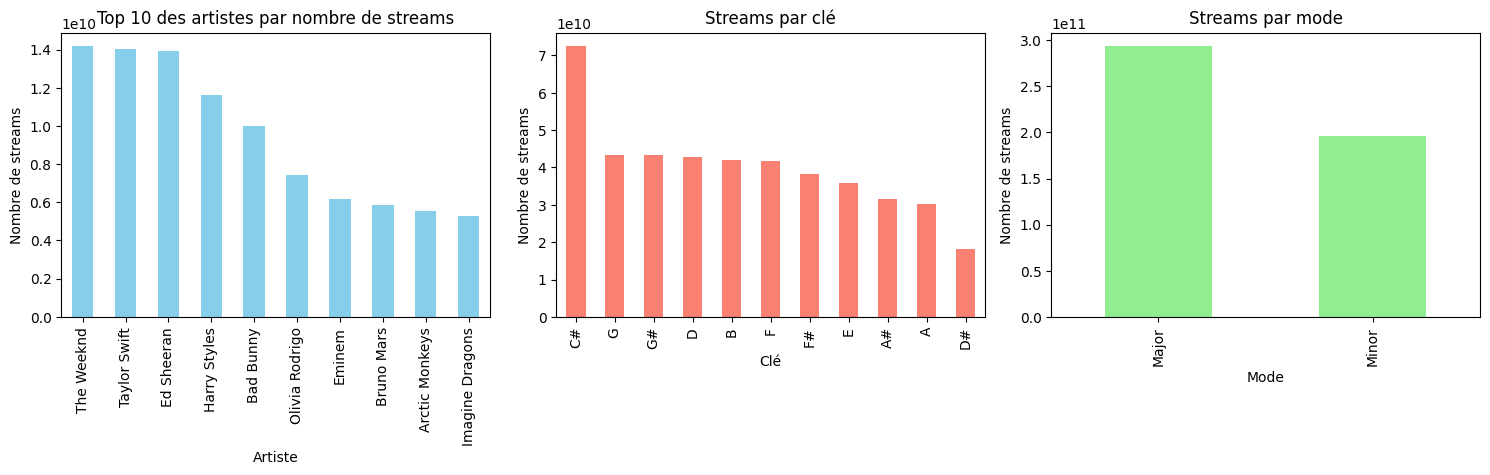

In [25]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

df = df.dropna(subset=['streams'])

# Comparaison des chiffres de streaming entre les artistes
artist_streams = df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

# Comparaison des chiffres de streaming entre les genres
genre_streams = df.groupby('key')['streams'].sum().sort_values(ascending=False)

# Comparaison des chiffres de streaming entre les clés
key_streams = df.groupby('mode')['streams'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 5))

# Comparaison des chiffres de streaming entre les artistes (Top 10)
plt.subplot(1, 3, 1)
artist_streams.plot(kind='bar', color='skyblue')
plt.title('Top 10 des artistes par nombre de streams')
plt.xlabel('Artiste')
plt.ylabel('Nombre de streams')

# Comparaison des chiffres de streaming entre les genres
plt.subplot(1, 3, 2)
genre_streams.plot(kind='bar', color='salmon')
plt.title('Streams par clé')
plt.xlabel('Clé')
plt.ylabel('Nombre de streams')

# Comparaison des chiffres de streaming entre les clés
plt.subplot(1, 3, 3)
key_streams.plot(kind='bar', color='lightgreen')
plt.title('Streams par mode')
plt.xlabel('Mode')
plt.ylabel('Nombre de streams')

plt.tight_layout()
plt.show()

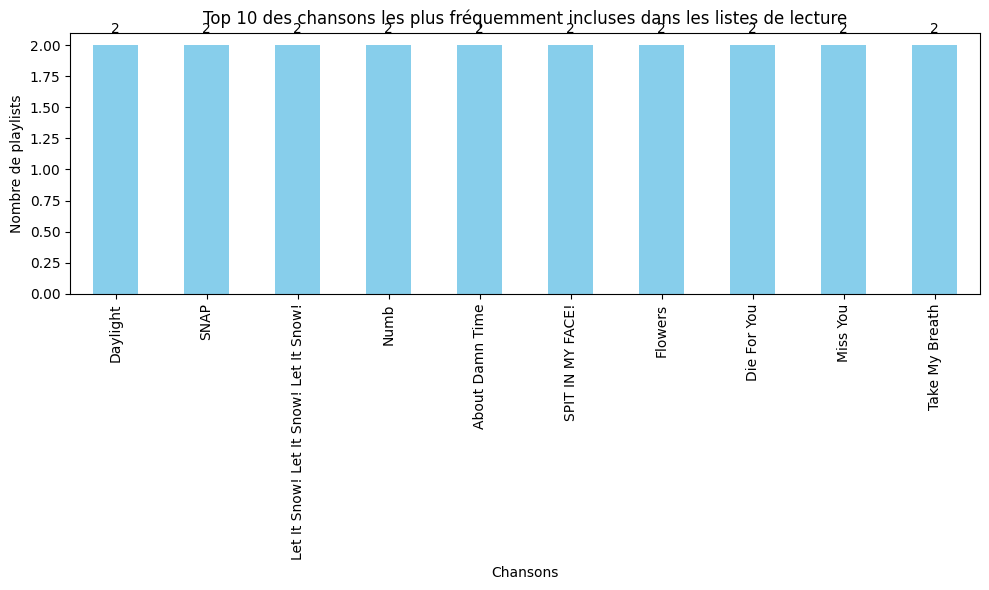

In [26]:

plt.figure(figsize=(10, 6))
ax = top_playlist_songs.plot(kind='bar', color='skyblue')

plt.title('Top 10 des chansons les plus fréquemment incluses dans les listes de lecture')
plt.xlabel('Chansons')
plt.ylabel('Nombre de playlists')

# Afficher les valeurs au-dessus de chaque barre
for i, v in enumerate(top_playlist_songs):
    ax.text(i, v + 0.1, str(v), ha='center')

plt.tight_layout()
plt.show()

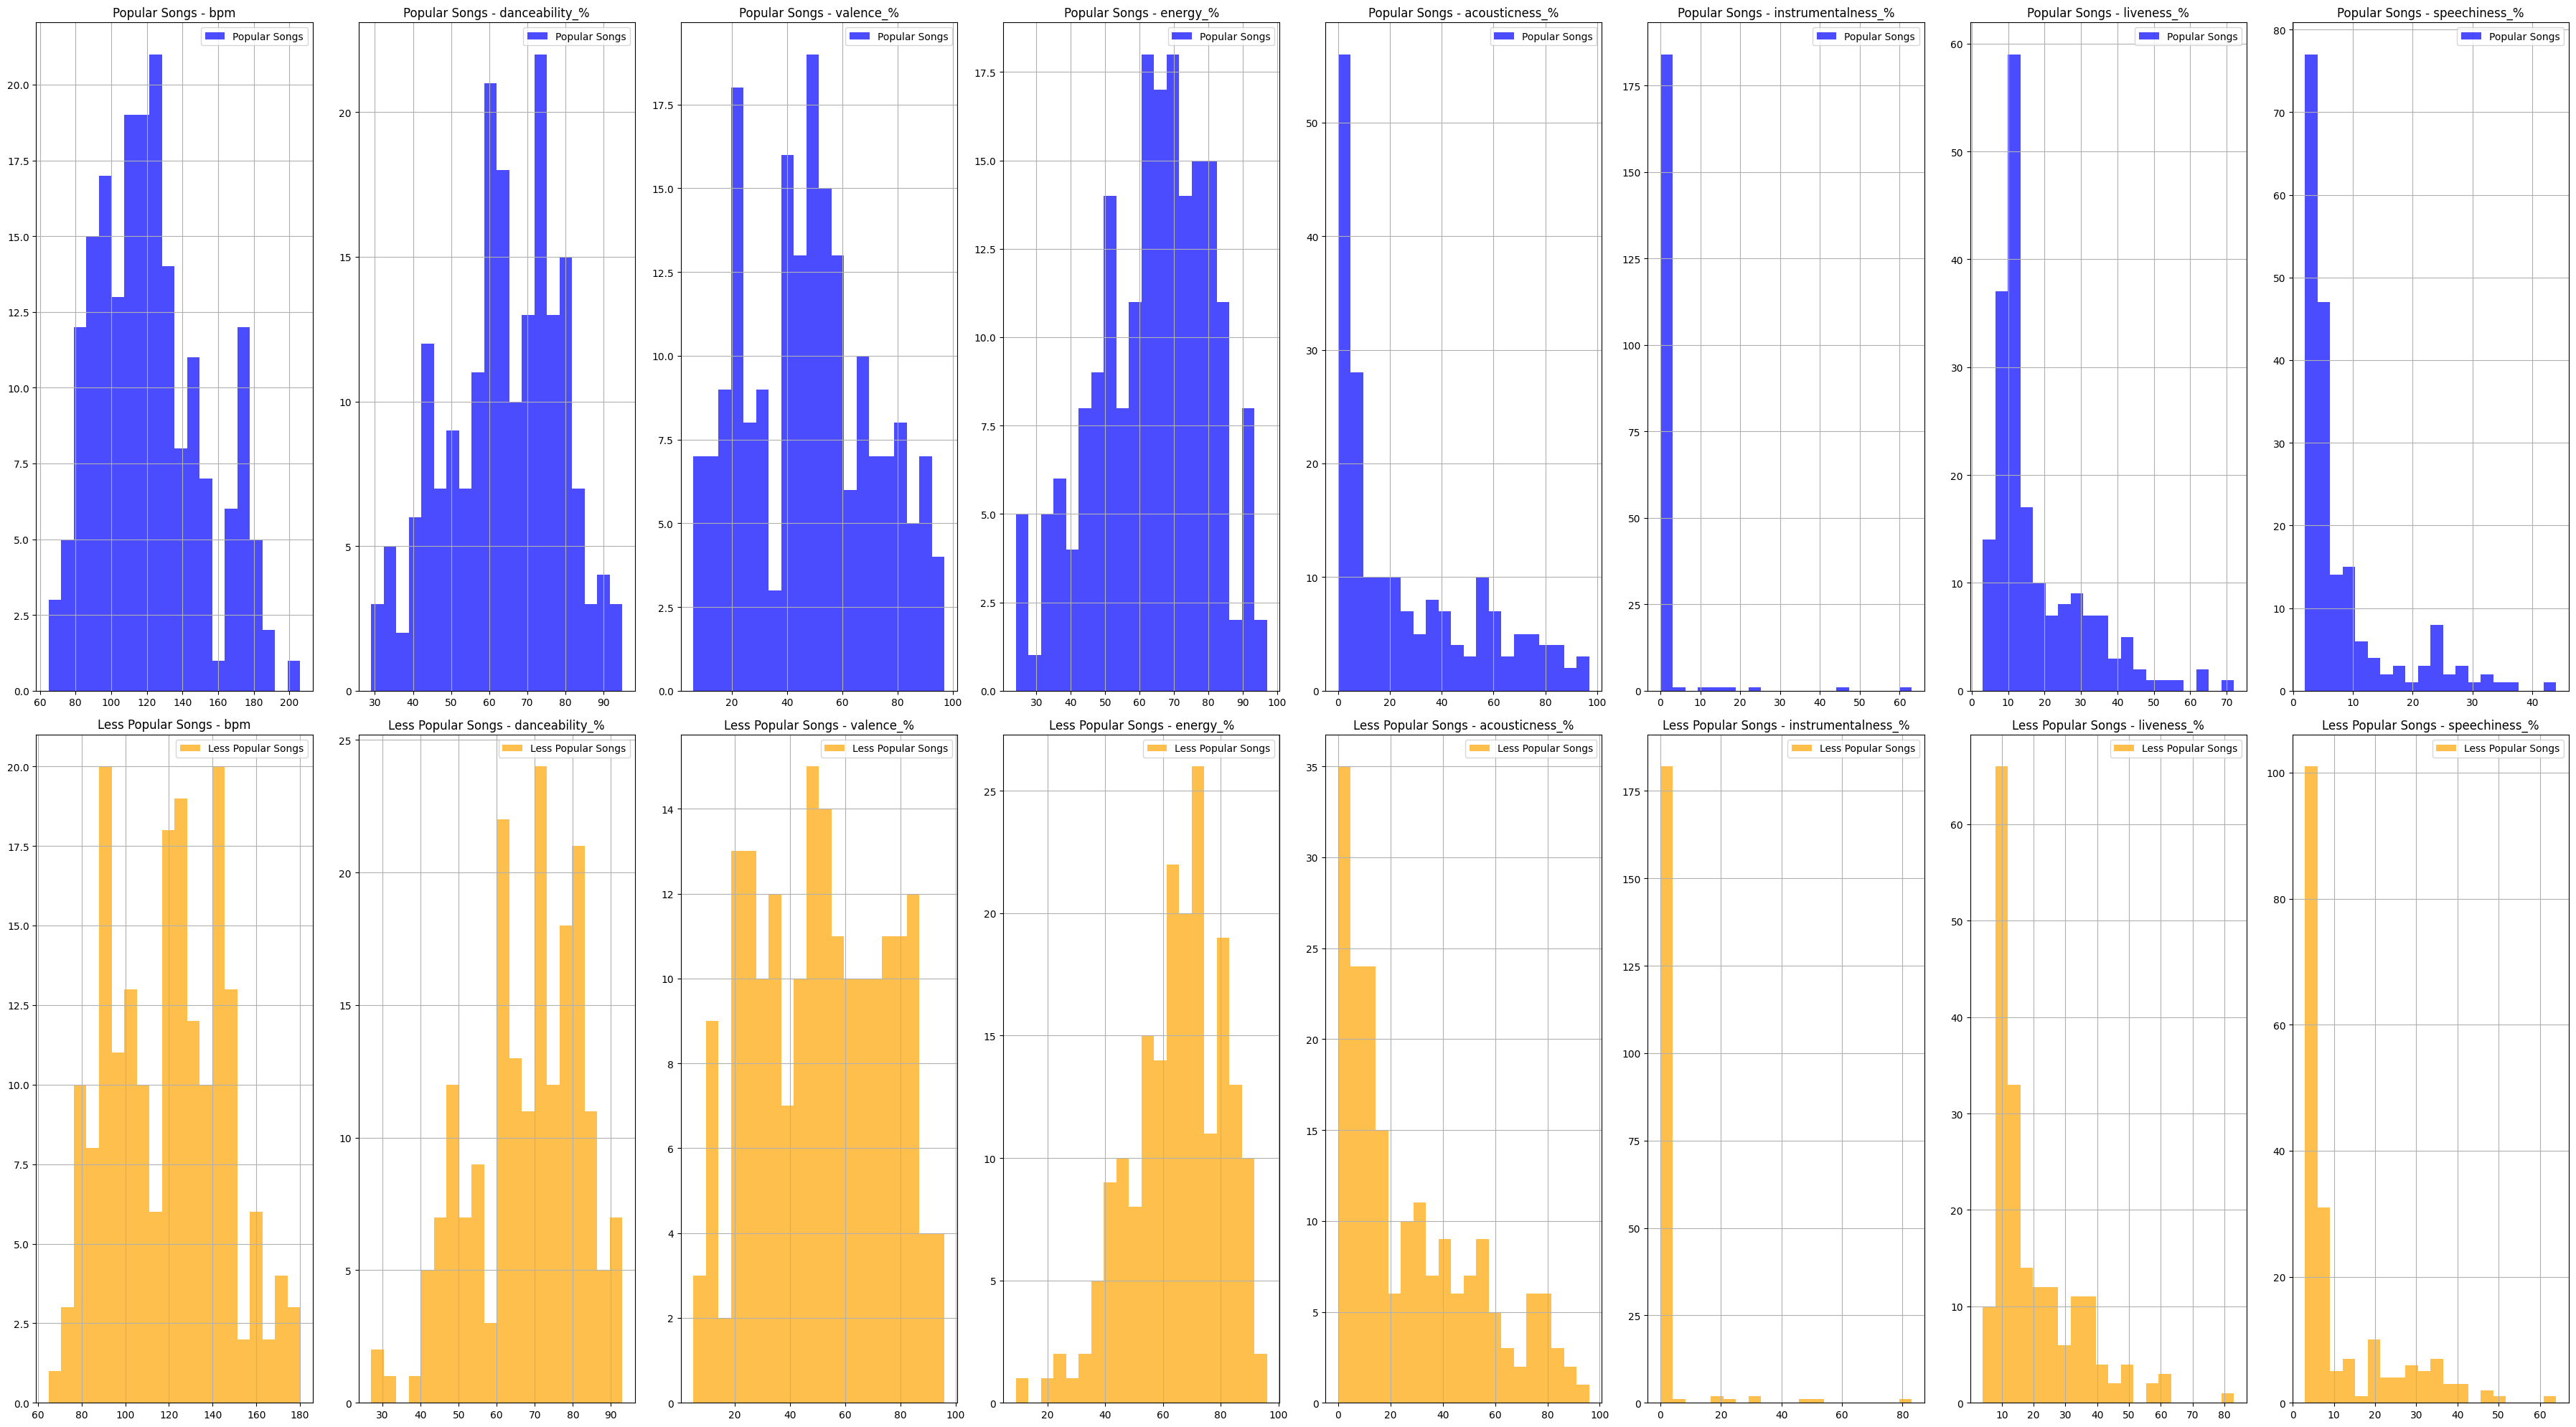

In [30]:
# Déterminer les seuils pour les chansons les plus populaires et moins populaires
top_threshold = df['streams'].quantile(0.8)  # Les 20 % supérieurs
bottom_threshold = df['streams'].quantile(0.2)  # Les 20 % inférieurs

# Diviser les données en chansons les plus populaires et moins populaires
popular_songs = df[df['streams'] >= top_threshold]
less_popular_songs = df[df['streams'] <= bottom_threshold]

# Caractéristiques à comparer
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Calculer les statistiques descriptives pour chaque groupe
popular_stats = popular_songs[features].describe()
less_popular_stats = less_popular_songs[features].describe()

# Visualiser les différences
fig, axes = plt.subplots(nrows=2, ncols=len(features), figsize=(36, 20))

for i, feature in enumerate(features):
    popular_songs[feature].hist(ax=axes[0, i], color='blue', alpha=0.7, bins=20, label='Popular Songs')
    less_popular_songs[feature].hist(ax=axes[1, i], color='orange', alpha=0.7, bins=20, label='Less Popular Songs')

    axes[0, i].set_title(f'Popular Songs - {feature}')
    axes[1, i].set_title(f'Less Popular Songs - {feature}')
    axes[0, i].legend()
    axes[1, i].legend()

plt.tight_layout()
plt.show()

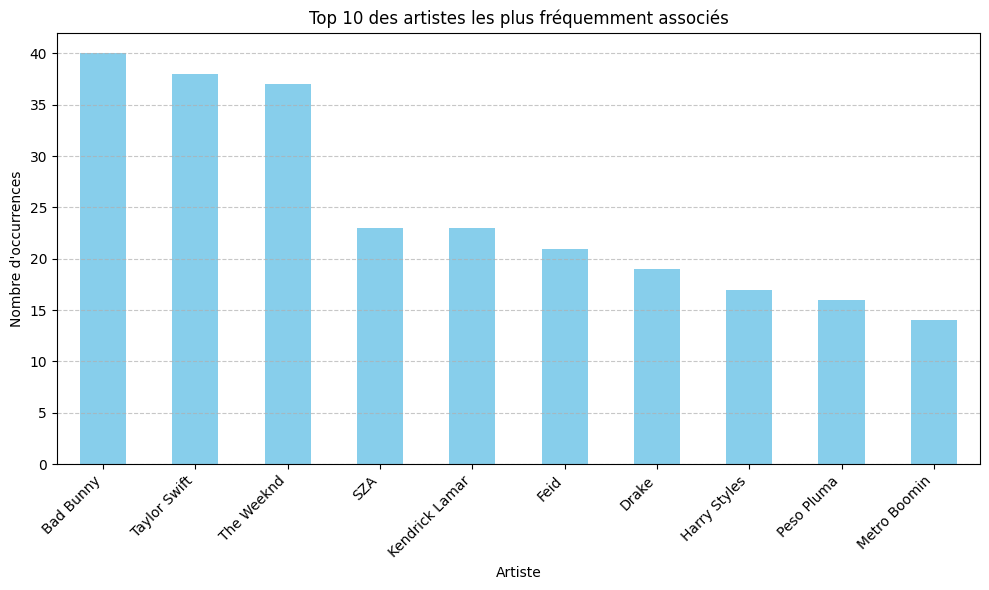

In [28]:
top_artists = artist_counts.head(10)

plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 des artistes les plus fréquemment associés')
plt.xlabel('Artiste')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()